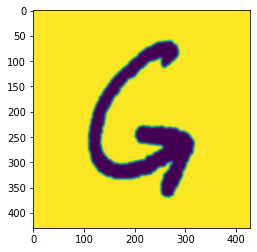

In [30]:
import mahotas
import scipy.io
import skimage.io
import matplotlib.pyplot as plt
image = skimage.io.imread("test.jpg")
plt.imshow(image)

In [31]:

moments = mahotas.features.zernike_moments(image, 21, degree=8)
print(moments)

[0.31830989 0.02842042 0.02678415 0.0345862  0.02398946 0.03162968
 0.0082653  0.01623806 0.02860827 0.00301335 0.00405256 0.01979818
 0.01004851 0.00371142 0.00263745 0.0158083  0.00512718 0.00900778
 0.00878119 0.00772429 0.01190808 0.00572046 0.00531117 0.00350372
 0.00273018]


3 (430, 429, 3)


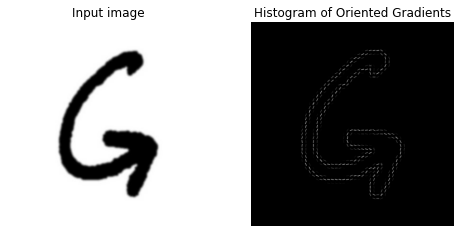

In [33]:
import skimage.feature
from skimage import data, exposure, color

image = color.gray2rgb(image)
print(image.ndim,image.shape)
fd, hog_image = skimage.feature.hog(image, orientations=8, pixels_per_cell=(8, 8),
                    cells_per_block=(1, 1), visualize=True, multichannel=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
# ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.imshow(hog_image, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

In [34]:
import torchvision
from torch.utils.data import DataLoader, TensorDataset
import torchvision.transforms as transforms
transform = transforms.Compose([
    transforms.Resize(32),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])
dataset = torchvision.datasets.ImageFolder("./data/classified/",transform=transform)
loader = DataLoader(dataset,batch_size=1,shuffle=True)

In [35]:
for x,y in loader:
    print(x.shape)
    print(y.shape)

torch.Size([10, 3, 32, 32])
torch.Size([10])
torch.Size([10, 3, 32, 32])
torch.Size([10])
torch.Size([10, 3, 32, 32])
torch.Size([10])
torch.Size([10, 3, 32, 32])
torch.Size([10])
torch.Size([10, 3, 32, 32])
torch.Size([10])
torch.Size([10, 3, 32, 32])
torch.Size([10])
torch.Size([10, 3, 32, 32])
torch.Size([10])
torch.Size([10, 3, 32, 32])
torch.Size([10])
torch.Size([10, 3, 32, 32])
torch.Size([10])
torch.Size([10, 3, 32, 32])
torch.Size([10])
torch.Size([10, 3, 32, 32])
torch.Size([10])
torch.Size([10, 3, 32, 32])
torch.Size([10])
torch.Size([10, 3, 32, 32])
torch.Size([10])
torch.Size([10, 3, 32, 32])
torch.Size([10])
torch.Size([10, 3, 32, 32])
torch.Size([10])
torch.Size([10, 3, 32, 32])
torch.Size([10])
torch.Size([10, 3, 32, 32])
torch.Size([10])
torch.Size([10, 3, 32, 32])
torch.Size([10])
torch.Size([10, 3, 32, 32])
torch.Size([10])
torch.Size([10, 3, 32, 32])
torch.Size([10])
torch.Size([10, 3, 32, 32])
torch.Size([10])
torch.Size([10, 3, 32, 32])
torch.Size([10])
torch.Size

(430, 429)
(325, 2)
[[ 61 261]
 [ 61 263]
 [ 61 268]
 [ 62 256]
 [ 63 247]
 [ 63 275]
 [ 65 242]
 [ 66 279]
 [ 67 239]
 [ 67 281]
 [ 68 237]
 [ 69 283]
 [ 70 234]
 [ 71 232]
 [ 72 229]
 [ 72 285]
 [ 73 226]
 [ 75 223]
 [ 75 286]
 [ 76 221]
 [ 79 218]
 [ 79 287]
 [ 80 216]
 [ 82 213]
 [ 82 287]
 [ 84 210]
 [ 85 287]
 [ 87 208]
 [ 88 287]
 [ 90 206]
 [ 93 202]
 [ 93 284]
 [ 95 199]
 [ 96 197]
 [ 96 247]
 [ 96 251]
 [ 96 281]
 [ 97 244]
 [ 98 242]
 [ 98 279]
 [ 99 194]
 [ 99 240]
 [100 235]
 [100 277]
 [101 232]
 [101 275]
 [102 191]
 [102 253]
 [104 189]
 [104 227]
 [104 272]
 [106 188]
 [106 270]
 [107 224]
 [107 254]
 [108 186]
 [108 267]
 [110 221]
 [111 256]
 [112 181]
 [112 258]
 [112 261]
 [114 178]
 [114 216]
 [117 175]
 [118 211]
 [120 172]
 [120 209]
 [121 170]
 [124 167]
 [126 165]
 [126 204]
 [129 162]
 [129 202]
 [131 200]
 [133 159]
 [133 196]
 [134 193]
 [136 156]
 [137 187]
 [139 186]
 [140 153]
 [141 184]
 [142 152]
 [146 180]
 [147 148]
 [149 147]
 [149 178]
 [151 176]
 

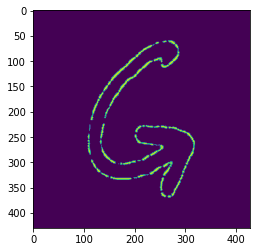

In [45]:
image = skimage.io.imread("test.jpg")
print(image.shape)
result_img = skimage.feature.corner_fast(image, n=7, threshold=0.15)
locs = skimage.feature.corner_peaks(result_img, min_distance=1)
plt.imshow(result_img)
print(locs.shape)
ind = np.lexsort((locs[:,1],locs[:,0])) 
locs = locs[ind]
print(locs)